In [78]:
import matplotlib.pyplot as plt

In [79]:
# Hipêrpárametros
PATH_IMAGE = 'imagens/imagem.jpg'
SIZE_MASK = 5
BLUR_DIVISION = 40

In [80]:
# Máscara
mask = [
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]
mask = [[i / BLUR_DIVISION for i in j] for j in mask]

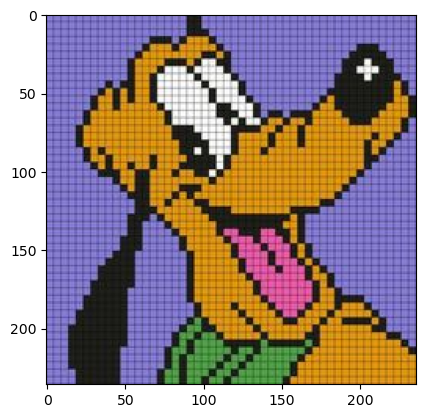

In [81]:
# Lê a imagem e printa ela na tela
image = plt.imread(PATH_IMAGE)
plt.imshow(image)

In [82]:
# Pega o tamanho da imagem
height, width, _ = image.shape
print(f'Altura: {height}, Largura: {width}')

Altura: 236, Largura: 236


In [83]:
# Cria três matrizes para armazenar os valores de cada canal
red = [[0 for _ in range(width)] for _ in range(height)]
green = [[0 for _ in range(width)] for _ in range(height)]
blue = [[0 for _ in range(width)] for _ in range(height)]

In [84]:
# Preenche as matrizes com os valores de cada canal
for i in range(height):
    for j in range(width):
        red[i][j] = image[i][j][0]
        green[i][j] = image[i][j][1]
        blue[i][j] = image[i][j][2]

In [85]:
# Cria as três matrizes para armazenar os valores de cada canal após a aplicação da máscara
red_mask = [[0 for _ in range(width)] for _ in range(height)]
green_mask = [[0 for _ in range(width)] for _ in range(height)]
blue_mask = [[0 for _ in range(width)] for _ in range(height)]

In [86]:
# Cria a função que aplica a máscara
def apply_mask(red, green, blue, red_mask, green_mask, blue_mask, mask):
    for i in range(height):
        for j in range(width):
            for k in range(SIZE_MASK):
                for l in range(SIZE_MASK):
                    if i + k - SIZE_MASK // 2 >= 0 and i + k - SIZE_MASK // 2 < height and j + l - SIZE_MASK // 2 >= 0 and j + l - SIZE_MASK // 2 < width:
                        red_mask[i][j] += red[i + k - SIZE_MASK // 2][j + l - SIZE_MASK // 2] * mask[k][l]
                        green_mask[i][j] += green[i + k - SIZE_MASK // 2][j + l - SIZE_MASK // 2] * mask[k][l]
                        blue_mask[i][j] += blue[i + k - SIZE_MASK // 2][j + l - SIZE_MASK // 2] * mask[k][l]

In [87]:
# Aplica a máscara
apply_mask(red, green, blue, red_mask, green_mask, blue_mask, mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


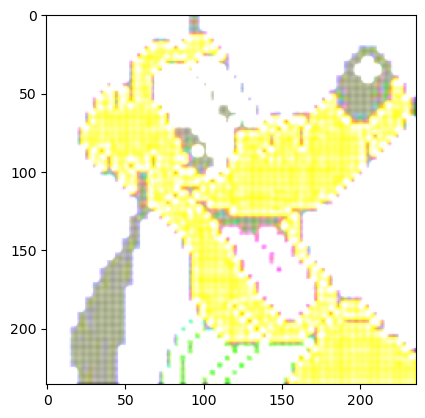

In [89]:
# Cria a imagem final
image_mask = [[0 for _ in range(width)] for _ in range(height)]
for i in range(height):
    for j in range(width):
        red = int(red_mask[i][j])
        green = int(green_mask[i][j])
        blue = int(blue_mask[i][j])
        image_mask[i][j] = [red, green, blue]

# Plota a imagem final
plt.imshow(image_mask)